#### Interpolation by Kelompok 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as cb
import random

In [12]:
def decomp (c,d,e):
    n = len(d)
    
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam

    return c,d,e

In [13]:
def solve (c,d,e,b):

    n = len(d)

    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]

    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b

#### Cara menentukan nilai y, pada nilai x tertentu di suatu interpolation

In [14]:
def curvatures(x_data, y_data):
    
    n = len (x_data) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)

    c[0:n-1] = x_data[0:n-1] - x_data[1:n]
    d[1:n] = 2.0*(x_data[0:n-1] - x_data[2:n+1])
    e[1:n] = x_data[1:n] - x_data[2:n+1]
    k[1:n] =6.0*(y_data[0:n-1] - y_data[1:n]) \
                 /(x_data[0:n-1] - x_data[1:n]) \
             -6.0*(y_data[1:n] - y_data[2:n+1])   \
                 /(x_data[1:n] - x_data[2:n+1])
    
    decomp (c,d,e)
    solve (c,d,e,k)

    return k

In [15]:
def evalSpline (x_data, y_data, k, x):  
    
    def findSegment (x_data, x):
        
        iLeft = 0
        iRight = len(x_data)- 1
        
        while 1:
            if (iRight-iLeft) <= 1: 
                return iLeft
            i = int ((iLeft + iRight)/2)
            if np.all(x < x_data[i]): 
                iRight = i
            else: 
                iLeft = i

    i = findSegment(x_data, x)
    h = x_data[i] - x_data[i+1]
    
    y = ((x - x_data[i+1])**3/h - (x - x_data[i+1])*h)*k[i]/6.0 \
      - ((x - x_data[i])**3/h - (x - x_data[i])*h)*k[i+1]/6.0   \
      + (y_data[i]*(x - x_data[i+1])                            \
       - y_data[i+1]*(x - x_data[i]))/h
    
    return y

##### Matrix x dan matrix y, secara random

In [16]:
batas_bawah, batas_atas, beda = 0, 10, 1
batas_bawah_random_y, batas_atas_random_y = -25.0, 25.0

x_data = np.arange (batas_bawah, batas_atas, beda)
y_data = np.array (range (batas_atas-batas_bawah), float)

for i in range (len(x_data)):
    y_data[i] = random.uniform (batas_bawah_random_y, batas_atas_random_y)

print (f"x = {x_data} \n y = {y_data}")

x = [0 1 2 3 4 5 6 7 8 9] 
 y = [11.54188898 -0.76315884 13.58743732  9.18565313  6.7177626  13.23706898
 21.65087124 18.64022943  4.15481909 14.71251351]


##### Matrix x dan matrix y, dengan nilai y yang diatur

In [17]:
#batas_bawah, batas_atas, beda = 0, 10, 1
#x_data = np.arange (batas_bawah, batas_atas, beda)
#y_data = np.array ([7.80810866, -13.30840274, 20.982456, 7.2365502, 20.17391967,
#  24.51653984,  -5.58923939, -21.01717089, 6.25987438, -20.66553439])

##### Panggil fungsi Spline dengan Kiusalas

In [18]:
k = curvatures (x_data, y_data)

#x = 0.5 # x1 = 0.5
x = np.arange (batas_bawah, batas_atas, beda/10)
y = np.arange (batas_bawah, batas_atas, beda/10)

for i in range (len (x)):
    y[i] = evalSpline (x_data, y_data, k, x[i])
    print (f"x = {x[i]} | y = {y[i]}") 

x = 0.0 | y = 11.541888978077374
x = 0.1 | y = 9.471399962303385
x = 0.2 | y = 7.451819081891288
x = 0.30000000000000004 | y = 5.534054472202973
x = 0.4 | y = 3.769014268600334
x = 0.5 | y = 2.2076066064452617
x = 0.6000000000000001 | y = 0.9007396210996466
x = 0.7000000000000001 | y = -0.10067855207461651
x = 0.8 | y = -0.745739777715638
x = 0.9 | y = -0.9835359204615259
x = 1.0 | y = -0.7631588449503894
x = 1.1 | y = -0.05795290719021706
x = 1.2000000000000002 | y = 1.0617275713314736
x = 1.3 | y = 2.5012757777572787
x = 1.4000000000000001 | y = 4.166084899229805
x = 1.5 | y = 5.961548122891645
x = 1.6 | y = 7.793058635885409
x = 1.7000000000000002 | y = 9.56600962535369
x = 1.8 | y = 11.185794278439086
x = 1.9000000000000001 | y = 12.557805782284209
x = 2.0 | y = 13.587437324031647
x = 2.1 | y = 14.205028387959034
x = 2.2 | y = 14.440703646884101
x = 2.3000000000000003 | y = 14.34953407075961
x = 2.4000000000000004 | y = 13.986590629538313
x = 2.5 | y = 13.406944293172982
x = 2.6 | 

##### Panggil fungsi Spline dengan SciPy

In [19]:
x_eq = np.arange (batas_bawah, batas_atas, beda/10)
y_eq = cb (x_data, y_data)

##### Plot Hasil

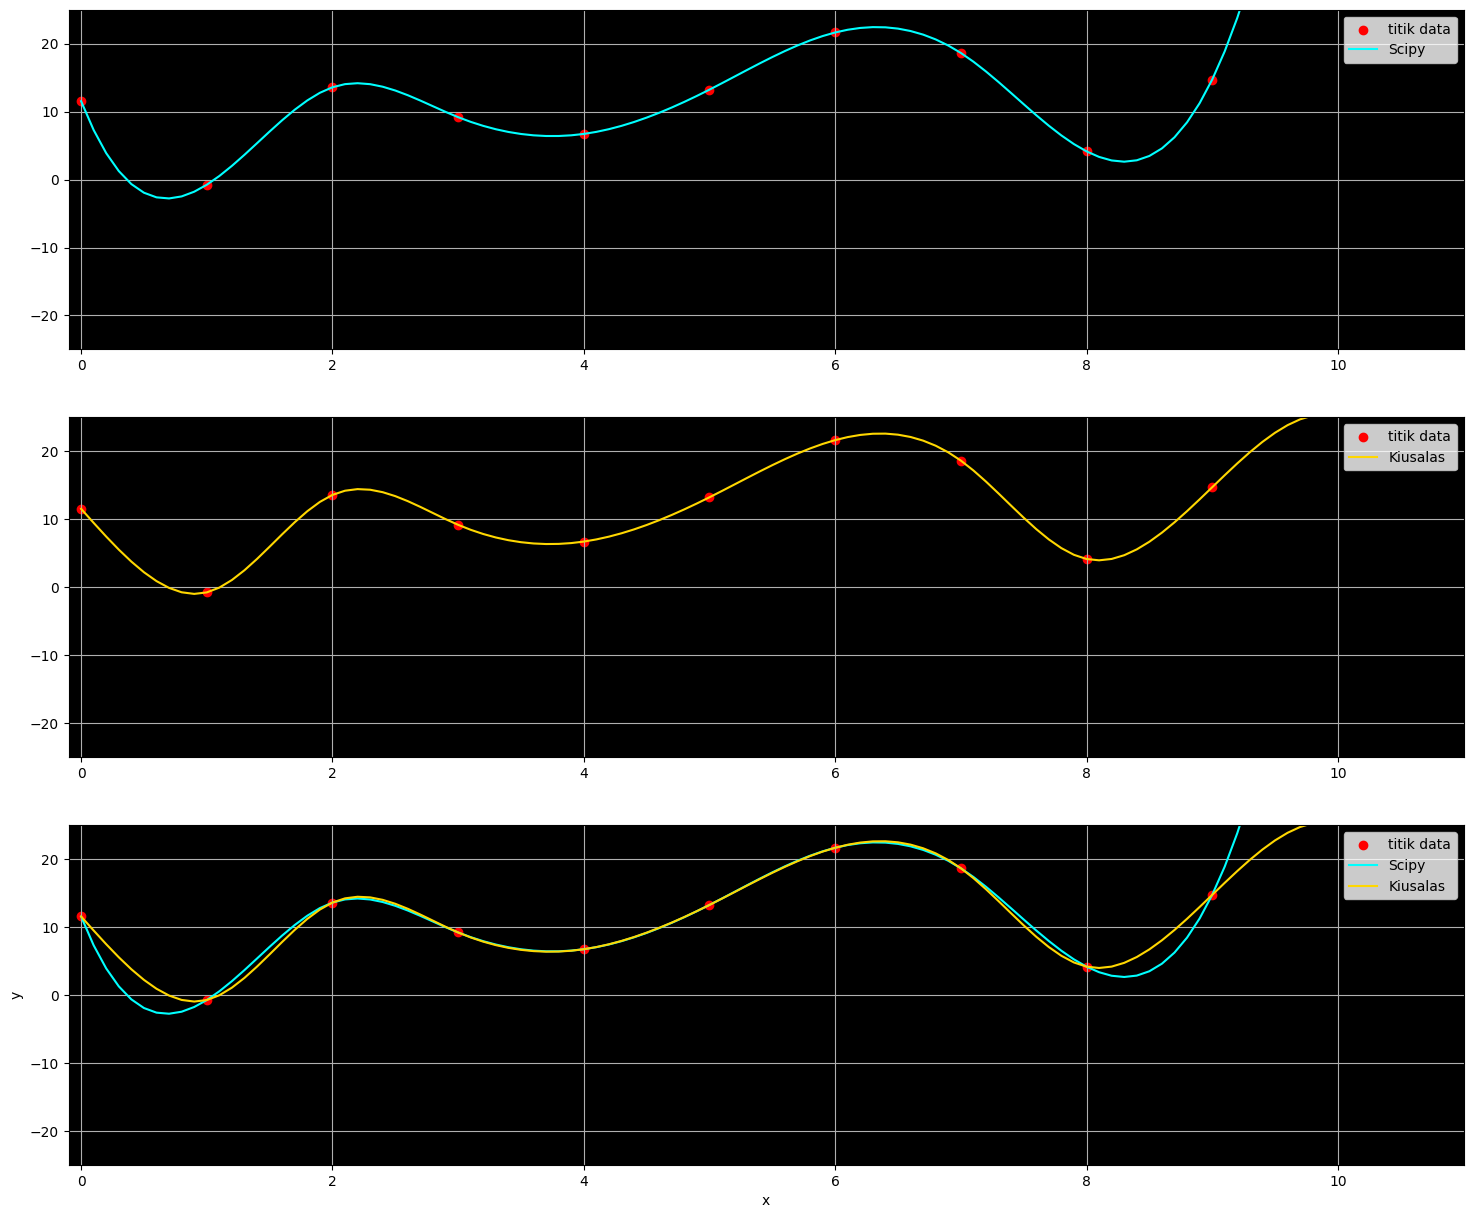

In [20]:
fig, ax = plt.subplots(3, figsize=(18, 15))

plt.ylabel ("y")
plt.xlabel ("x")

for i in range (len(ax)):

    ax[i].grid ()
    ax[i].scatter (x_data, y_data, color='red', label="titik data")
    #ax.plot (x, y, 'o', color='green', label=f"x, y({x}, {round(y, 3)})")

    ax[i].set_xlim (-0.1, 11)
    ax[i].set_ylim (batas_bawah_random_y, batas_atas_random_y)
    ax[i].set_facecolor ("black")

ax[0].plot (x_eq, y_eq (x_eq), color='cyan', label="Scipy")
ax[1].plot (x, y, color='gold', label="Kiusalas")
ax[2].plot (x_eq, y_eq (x_eq), color='cyan', label="Scipy")
ax[2].plot (x, y, color='gold', label="Kiusalas")

for i in range (len(ax)):
    ax[i].legend (loc="best")

plt.show ()